In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
import time 
import numpy as np
import matplotlib.animation as animation
%matplotlib qt
import pprint
import math
from sklearn.metrics import mean_squared_error
import scipy.optimize as optimize
import scipy.io as sio

In [2]:


def downsample_array(arr, df):
    return arr[:, ::df]

def downsample_array1d(arr, df):
    return arr[::df]

In [136]:
n_t = 200



dt = 0.05
gamma1 = 3.8
n = 8
m = 8
tau_2 = 5
k = 5
gamma2 = 1
n_c = 200
dx = 1.5

In [137]:
def create_fake_heaviside( N_c, N_t, extra_timesteps):
    fake_heaviside = []
    for i in range((N_c)):
        rows = [0 for k in range(i)]
        for k in range(i, N_t):
            rows.append(1)
        fake_heaviside.append(rows)
    extras = []
    for j in range(extra_timesteps):
        extras.append([0 for i in range(N_t)])
    fake_heaviside = np.concatenate((np.asarray(fake_heaviside).T, np.asarray(extras).T), axis=1)
    return fake_heaviside

In [130]:
fha = create_fake_heaviside(200,200, n_t-200)

In [138]:
u = np.zeros((n_t))
w = np.zeros(( n_t))

In [139]:
tau_d = 7

In [140]:
for i in range (n_t-1):
    u[i+1] = u[i] + dt*(-u[i]/tau_2 + gamma2)
    if (i - tau_d >= 0):
        w[i+1] = w[i] + dt*(-w[i] + gamma1*(u[i]**n/(u[i]**n+1))*(1/(1+w[i-tau_d]**m))    )
    else:
        w[i+1] = w[i] + dt*(-w[i] + gamma1*(u[i]**n/(u[i]**n+1))*(1)    )

In [127]:
"""for i, ti in enumerate(t):
    print (ti, i)"""

0.0 0
0.05 1
0.1 2
0.15000000000000002 3
0.2 4
0.25 5
0.30000000000000004 6
0.35000000000000003 7
0.4 8
0.45 9
0.5 10
0.55 11
0.6000000000000001 12
0.65 13
0.7000000000000001 14
0.75 15
0.8 16
0.8500000000000001 17
0.9 18
0.9500000000000001 19
1.0 20
1.05 21
1.1 22
1.1500000000000001 23
1.2000000000000002 24
1.25 25
1.3 26
1.35 27
1.4000000000000001 28
1.4500000000000002 29
1.5 30
1.55 31
1.6 32
1.6500000000000001 33
1.7000000000000002 34
1.75 35
1.8 36
1.85 37
1.9000000000000001 38
1.9500000000000002 39
2.0 40
2.0500000000000003 41
2.1 42
2.15 43
2.2 44
2.25 45
2.3000000000000003 46
2.35 47
2.4000000000000004 48
2.45 49
2.5 50
2.5500000000000003 51
2.6 52
2.6500000000000004 53
2.7 54
2.75 55
2.8000000000000003 56
2.85 57
2.9000000000000004 58
2.95 59
3.0 60
3.0500000000000003 61
3.1 62
3.1500000000000004 63
3.2 64
3.25 65
3.3000000000000003 66
3.35 67
3.4000000000000004 68
3.45 69
3.5 70
3.5500000000000003 71
3.6 72
3.6500000000000004 73
3.7 74
3.75 75
3.8000000000000003 76
3.85 77
3.

67.7 1354
67.75 1355
67.8 1356
67.85000000000001 1357
67.9 1358
67.95 1359
68.0 1360
68.05 1361
68.10000000000001 1362
68.15 1363
68.2 1364
68.25 1365
68.3 1366
68.35000000000001 1367
68.4 1368
68.45 1369
68.5 1370
68.55 1371
68.60000000000001 1372
68.65 1373
68.7 1374
68.75 1375
68.8 1376
68.85000000000001 1377
68.9 1378
68.95 1379
69.0 1380
69.05 1381
69.10000000000001 1382
69.15 1383
69.2 1384
69.25 1385
69.3 1386
69.35000000000001 1387
69.4 1388
69.45 1389
69.5 1390
69.55 1391
69.60000000000001 1392
69.65 1393
69.7 1394
69.75 1395
69.8 1396
69.85000000000001 1397
69.9 1398
69.95 1399
70.0 1400
70.05 1401
70.10000000000001 1402
70.15 1403
70.2 1404
70.25 1405
70.3 1406
70.35000000000001 1407
70.4 1408
70.45 1409
70.5 1410
70.55 1411
70.60000000000001 1412
70.65 1413
70.7 1414
70.75 1415
70.8 1416
70.85000000000001 1417
70.9 1418
70.95 1419
71.0 1420
71.05 1421
71.10000000000001 1422
71.15 1423
71.2 1424
71.25 1425
71.3 1426
71.35000000000001 1427
71.4 1428
71.45 1429
71.5 1430
71.55

135.35 2707
135.4 2708
135.45000000000002 2709
135.5 2710
135.55 2711
135.6 2712
135.65 2713
135.70000000000002 2714
135.75 2715
135.8 2716
135.85 2717
135.9 2718
135.95000000000002 2719
136.0 2720
136.05 2721
136.1 2722
136.15 2723
136.20000000000002 2724
136.25 2725
136.3 2726
136.35 2727
136.4 2728
136.45000000000002 2729
136.5 2730
136.55 2731
136.6 2732
136.65 2733
136.70000000000002 2734
136.75 2735
136.8 2736
136.85 2737
136.9 2738
136.95000000000002 2739
137.0 2740
137.05 2741
137.1 2742
137.15 2743
137.20000000000002 2744
137.25 2745
137.3 2746
137.35 2747
137.4 2748
137.45000000000002 2749
137.5 2750
137.55 2751
137.6 2752
137.65 2753
137.70000000000002 2754
137.75 2755
137.8 2756
137.85 2757
137.9 2758
137.95000000000002 2759
138.0 2760
138.05 2761
138.1 2762
138.15 2763
138.20000000000002 2764
138.25 2765
138.3 2766
138.35 2767
138.4 2768
138.45000000000002 2769
138.5 2770
138.55 2771
138.6 2772
138.65 2773
138.70000000000002 2774
138.75 2775
138.8 2776
138.85 2777
138.9 27

205.15 4103
205.20000000000002 4104
205.25 4105
205.3 4106
205.35000000000002 4107
205.4 4108
205.45000000000002 4109
205.5 4110
205.55 4111
205.60000000000002 4112
205.65 4113
205.70000000000002 4114
205.75 4115
205.8 4116
205.85000000000002 4117
205.9 4118
205.95000000000002 4119
206.0 4120
206.05 4121
206.10000000000002 4122
206.15 4123
206.20000000000002 4124
206.25 4125
206.3 4126
206.35000000000002 4127
206.4 4128
206.45000000000002 4129
206.5 4130
206.55 4131
206.60000000000002 4132
206.65 4133
206.70000000000002 4134
206.75 4135
206.8 4136
206.85000000000002 4137
206.9 4138
206.95000000000002 4139
207.0 4140
207.05 4141
207.10000000000002 4142
207.15 4143
207.20000000000002 4144
207.25 4145
207.3 4146
207.35000000000002 4147
207.4 4148
207.45000000000002 4149
207.5 4150
207.55 4151
207.60000000000002 4152
207.65 4153
207.70000000000002 4154
207.75 4155
207.8 4156
207.85000000000002 4157
207.9 4158
207.95000000000002 4159
208.0 4160
208.05 4161
208.10000000000002 4162
208.15 416

280.15000000000003 5603
280.2 5604
280.25 5605
280.3 5606
280.35 5607
280.40000000000003 5608
280.45 5609
280.5 5610
280.55 5611
280.6 5612
280.65000000000003 5613
280.7 5614
280.75 5615
280.8 5616
280.85 5617
280.90000000000003 5618
280.95 5619
281.0 5620
281.05 5621
281.1 5622
281.15000000000003 5623
281.2 5624
281.25 5625
281.3 5626
281.35 5627
281.40000000000003 5628
281.45 5629
281.5 5630
281.55 5631
281.6 5632
281.65000000000003 5633
281.7 5634
281.75 5635
281.8 5636
281.85 5637
281.90000000000003 5638
281.95 5639
282.0 5640
282.05 5641
282.1 5642
282.15000000000003 5643
282.2 5644
282.25 5645
282.3 5646
282.35 5647
282.40000000000003 5648
282.45 5649
282.5 5650
282.55 5651
282.6 5652
282.65000000000003 5653
282.7 5654
282.75 5655
282.8 5656
282.85 5657
282.90000000000003 5658
282.95 5659
283.0 5660
283.05 5661
283.1 5662
283.15000000000003 5663
283.2 5664
283.25 5665
283.3 5666
283.35 5667
283.40000000000003 5668
283.45 5669
283.5 5670
283.55 5671
283.6 5672
283.65000000000003 5

355.15000000000003 7103
355.20000000000005 7104
355.25 7105
355.3 7106
355.35 7107
355.40000000000003 7108
355.45000000000005 7109
355.5 7110
355.55 7111
355.6 7112
355.65000000000003 7113
355.70000000000005 7114
355.75 7115
355.8 7116
355.85 7117
355.90000000000003 7118
355.95000000000005 7119
356.0 7120
356.05 7121
356.1 7122
356.15000000000003 7123
356.20000000000005 7124
356.25 7125
356.3 7126
356.35 7127
356.40000000000003 7128
356.45000000000005 7129
356.5 7130
356.55 7131
356.6 7132
356.65000000000003 7133
356.70000000000005 7134
356.75 7135
356.8 7136
356.85 7137
356.90000000000003 7138
356.95000000000005 7139
357.0 7140
357.05 7141
357.1 7142
357.15000000000003 7143
357.20000000000005 7144
357.25 7145
357.3 7146
357.35 7147
357.40000000000003 7148
357.45000000000005 7149
357.5 7150
357.55 7151
357.6 7152
357.65000000000003 7153
357.70000000000005 7154
357.75 7155
357.8 7156
357.85 7157
357.90000000000003 7158
357.95000000000005 7159
358.0 7160
358.05 7161
358.1 7162
358.150000

430.1 8602
430.15000000000003 8603
430.20000000000005 8604
430.25 8605
430.3 8606
430.35 8607
430.40000000000003 8608
430.45000000000005 8609
430.5 8610
430.55 8611
430.6 8612
430.65000000000003 8613
430.70000000000005 8614
430.75 8615
430.8 8616
430.85 8617
430.90000000000003 8618
430.95000000000005 8619
431.0 8620
431.05 8621
431.1 8622
431.15000000000003 8623
431.20000000000005 8624
431.25 8625
431.3 8626
431.35 8627
431.40000000000003 8628
431.45000000000005 8629
431.5 8630
431.55 8631
431.6 8632
431.65000000000003 8633
431.70000000000005 8634
431.75 8635
431.8 8636
431.85 8637
431.90000000000003 8638
431.95000000000005 8639
432.0 8640
432.05 8641
432.1 8642
432.15000000000003 8643
432.20000000000005 8644
432.25 8645
432.3 8646
432.35 8647
432.40000000000003 8648
432.45000000000005 8649
432.5 8650
432.55 8651
432.6 8652
432.65000000000003 8653
432.70000000000005 8654
432.75 8655
432.8 8656
432.85 8657
432.90000000000003 8658
432.95000000000005 8659
433.0 8660
433.05 8661
433.1 8662

In [141]:
t = np.asarray([i*dt for i in range(n_t)])
x_ = np.asarray([i*dx for i in range(n_c)])

In [142]:
w.shape

(200,)

In [28]:
t, w = downsample_array1d(t, 3), downsample_array1d(w, 3)

In [145]:
ax = plt.gca()
ax.set_title("w vs time")
ax.set_xlabel("t")
ax.set_ylabel("w")
plt.plot(t,w)
plt.savefig("w_vs_t.png")

In [246]:
w[:10].shape,#+ beta*(w[cell-1][i]+w[cell+1][i]) 

(10,)

In [53]:
def create_heaviside( v_0, dt, dx, N_c, N_t):
    x = np.asarray([dx*i for i in range(N_c)])
    heaviside = []
    for i in range(N_t):
        ha = (x-v_0*i*dt)
        ha[ ha > 0] = 1
        ha[ ha <=0] = 0
        heaviside.append(ha)
        
    return np.asarray(heaviside).T
v_0 = 2.55
ha = create_heaviside(v_0, dt, dx, n_c, n_t)

In [147]:
u, w = np.ones((n_c, n_t)), np.zeros((n_c, n_t))

In [148]:
beta = 0.5

In [86]:
"""for time in range (n_t-1):
    for cell in range(1, n_c-1):
        u[cell, time+1] = u[cell, time] +   dt * (gamma2*ha[cell, time] - u[cell, time])
        if (time - tau_d >= 0):
            feedback_w = 1/(1 + w[cell][time-tau_d]**m)
        else:
            feedback_w = 1
        source_u = u[cell][time]**n/(u[cell][time]**n + 1)
        c = beta*(w[cell-1][time]+w[cell+1][time])
        w[cell][time+1] = w[cell][time] + (dt)*(-w[cell][time] + feedback_w*source_u*gamma1 + c) """

'for time in range (n_t-1):\n    for cell in range(1, n_c-1):\n        u[cell, time+1] = u[cell, time] +   dt * (gamma2*ha[cell, time] - u[cell, time])\n        if (time - tau_d >= 0):\n            feedback_w = 1/(1 + w[cell][time-tau_d]**m)\n        else:\n            feedback_w = 1\n        source_u = u[cell][time]**n/(u[cell][time]**n + 1)\n        c = beta*(w[cell-1][time]+w[cell+1][time])\n        w[cell][time+1] = w[cell][time] + (dt)*(-w[cell][time] + feedback_w*source_u*gamma1 + c) '

In [149]:
for i in range (n_t-1):
    for cell in range(1, n_c-1):
        u[cell][i+1] = u[cell][i] + (1/tau_2)*dt*(-u[cell][i] + fha[cell][i])
        
        if (i - tau_d >= 0):
            w[cell][i+1] = w[cell][i] + (1/tau_2)*dt*(-w[cell][i] + (u[cell][i]**n/(u[cell][i]**n+1))*(1/(1+w[cell][i-tau_d]**m))    )
        else:
            w[cell][i+1] = w[cell][i] + (1/tau_2)*dt*(-w[cell][i] *(u[cell][i]**n/(u[cell][i]**n+1))*(1)    )
            
            
            
            
            

In [151]:
plt.plot(t,u[9, :])
plt.show()

In [277]:
ax = plt.gca()
ax.set_title("w vs time")
ax.set_xlabel("t")
ax.set_ylabel("w")
plt.plot(t, w[1, :])
plt.savefig("w_vs_t.png")

In [224]:
w[0, :].shape

(50000,)

In [117]:
w = downsample_array(w, 4)

In [118]:
def save_animation(filename, animation_object):# supported format is mp4
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
    animation_object.save(filename, writer=writer)

fig = plt.figure()
ax = plt.axes(xlim=(0, 2*x_[-1]), ylim=(np.amin(u),1.2*np.amax(u)))
ax.set_ylabel("w")
ax.set_xlabel("cell_index_i")
fig.tight_layout()
line, = ax.plot([], [], color='steelblue', lw=2)

def update(num, u, line):
    line.set_data(x_, u[:, num])
    return line,

ani = animation.FuncAnimation(fig, update, n_c, fargs=[ w, line],
                              interval=40, blit=True)
plt.show()

In [280]:
u[-1,:-1].shape

(9999,)

In [146]:
for e in  w[199, :]:
    print (e)

0.0
3.962801991189865e-09
1.7030096174365777e-07
1.2392149064806397e-06
4.450812746164111e-06
1.0961385978174602e-05
2.139788940577822e-05
3.574846831337589e-05
5.3485999574889e-05
7.377702444199234e-05
9.567917631453803e-05
0.00011828602070941977
0.00014081361300404712
0.00016263925394859207
0.00018330720679236926
0.00020251474053161828
0.00022008855253856987
0.00023595825576887343
0.0002501308989890521
0.00026266855593389617
0.0002736697666753459
0.0002832548719696927
0.0002915548882806902
0.00029870340074684043
0.000304830912922966
0.0003100611251848901
0.0003145086801445178
0.0003182779906651425
0.0003214628416194922
0.00032414652425927145
0.00032640231959832724
0.0003282941942963237
0.0003298776099892256
0.0003312003761338719
0.00033230349861805087
0.0003332219929672881
0.00033398564313346827
0.0003346196955744864
0.0003351454844442319
0.00033558098786114427
0.00033594131792405945
0.0003362391487924971
0.0003364850880471985
0.00033668799692310967
0.0003368552650301091
0.0003369930

8.888013647873966e-236
7.223531181455111e-236
5.870761470182844e-236
4.771328993988111e-236
3.8777904384873367e-236
3.1515873752568493e-236
2.5613823529542893e-236
2.081706596058816e-236
1.6918609549707174e-236
1.3750226798902093e-236
1.1175194728999886e-236
9.08239491299225e-237
7.381518419894704e-237
5.999168747678212e-237
4.8756945749909394e-237
3.962615655422582e-237
3.2205307740518437e-237
2.617417488518336e-237
2.1272502835751023e-237
1.728877508591477e-237
1.4051086347390104e-237
1.1419724445111611e-237
9.281141424572283e-238
7.543053708613659e-238
6.130459862660941e-238
4.9824041247644816e-238
4.049346038611166e-238
3.291022682652879e-238
2.674711245333873e-238
2.173816972382201e-238
1.7667255527736447e-238
1.4358704211756462e-238
1.1669747288603436e-238
9.484352724480762e-239
7.708217956646515e-239
6.26470057913895e-239
5.0915110972267085e-239
4.1380250361570235e-239
3.363098416297384e-239
2.733292328129699e-239
2.221429994094042e-239
1.8054240517872657e-239
1.4673234536310478

In [86]:
save_animation("w.mp4", ani)

In [23]:
t = np.asarray([i*dt for i in range(n_t)])

In [32]:
plt.plot(t, w[199, :])

In [34]:
np.amin( w[199, :]),  w[199, :].shape

(0.0, (10000,))

<IPython.core.display.Javascript object>


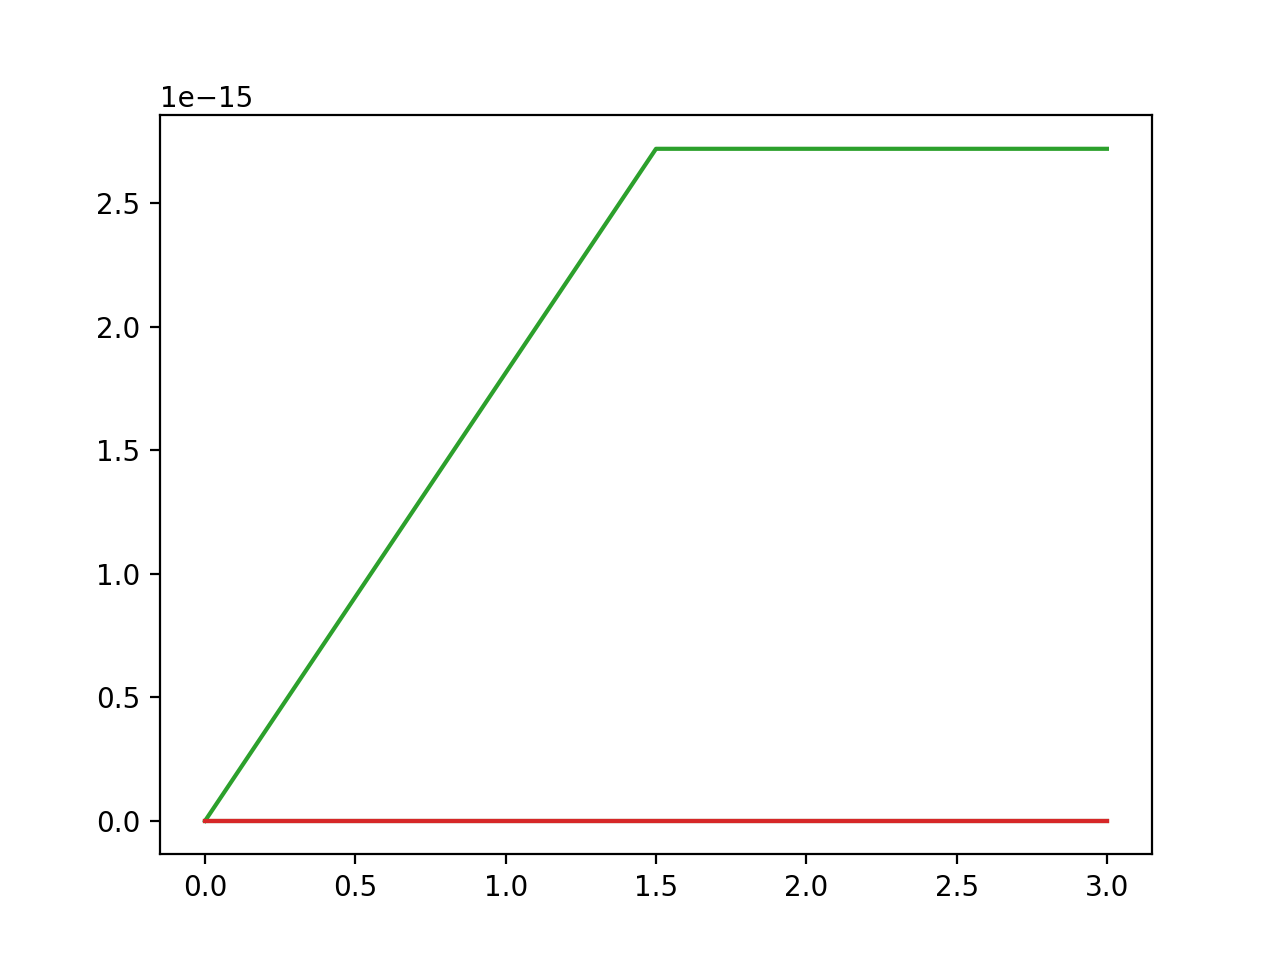

In [40]:
%matplotlib qt
for i in range(3):
    plt.plot(x_, w[:, i])

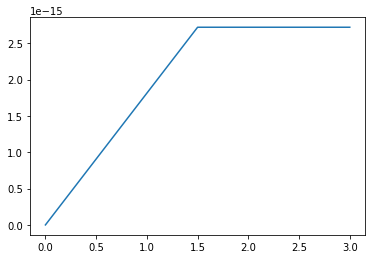

In [44]:
%matplotlib inline 
plt.plot(x_, w[:, 2])


In [98]:
u = np.linspace(-math.log(1.5), 10, 100)

In [106]:
u

array([-0.40546511, -0.3003594 , -0.19525369, -0.09014798,  0.01495772,
        0.12006343,  0.22516914,  0.33027485,  0.43538056,  0.54048627,
        0.64559197,  0.75069768,  0.85580339,  0.9609091 ,  1.06601481,
        1.17112051,  1.27622622,  1.38133193,  1.48643764,  1.59154335,
        1.69664906,  1.80175476,  1.90686047,  2.01196618,  2.11707189,
        2.2221776 ,  2.3272833 ,  2.43238901,  2.53749472,  2.64260043,
        2.74770614,  2.85281184,  2.95791755,  3.06302326,  3.16812897,
        3.27323468,  3.37834039,  3.48344609,  3.5885518 ,  3.69365751,
        3.79876322,  3.90386893,  4.00897463,  4.11408034,  4.21918605,
        4.32429176,  4.42939747,  4.53450318,  4.63960888,  4.74471459,
        4.8498203 ,  4.95492601,  5.06003172,  5.16513742,  5.27024313,
        5.37534884,  5.48045455,  5.58556026,  5.69066597,  5.79577167,
        5.90087738,  6.00598309,  6.1110888 ,  6.21619451,  6.32130021,
        6.42640592,  6.53151163,  6.63661734,  6.74172305,  6.84

In [102]:
[(3-2*math.exp(-ui)) for ui in u[1:]]

[0.29931193210447704,
 0.5687613199755823,
 0.8113275688839976,
 1.0296928269177088,
 1.2262716425225657,
 1.403237663090923,
 1.5625476698148948,
 1.7059632145668235,
 1.835070098054247,
 1.951295904626801,
 2.0559257876241444,
 2.150116679809554,
 2.234910086019411,
 2.311243599481804,
 2.379961269144612,
 2.4418229326485905,
 2.497512618143711,
 2.547646107850886,
 2.592777747002263,
 2.63340657344916,
 2.669981835715071,
 2.702907960508969,
 2.7325490246266093,
 2.7592327806873547,
 2.7832542812206515,
 2.8048791411750584,
 2.824346474924651,
 2.841871540248406,
 2.8576481185180573,
 2.87185065741308,
 2.8846361998556165,
 2.8961461204943264,
 2.906507688938123,
 2.9158354770250705,
 2.9242326256871634,
 2.9317919854191827,
 2.9385971429622475,
 2.9447233455544826,
 2.950238332968602,
 2.9552030865365713,
 2.95967250344359,
 2.963696003747335,
 2.9673180768345016,
 2.97057877335702,
 2.9735141480874847,
 2.9761566585906074,
 2.9785355241189646,
 2.9806770487014855,
 2.9826049119971

In [103]:
lamb = [math.log(3-2*math.exp(-ui)) for ui in u[1:]]

In [105]:
plt.plot(u[1:], lamb)

In [107]:
lamb

[-1.2062689982142405,
 -0.5642944056612729,
 -0.2090833990368093,
 0.029260531469753454,
 0.20397838109750074,
 0.33878218313284336,
 0.44631761084457183,
 0.5341298864494562,
 0.6070826813514317,
 0.6684937183244242,
 0.7207262514279115,
 0.765522110345888,
 0.8042009972873416,
 0.8377857344267979,
 0.8670842140823186,
 0.8927448639066858,
 0.9152952838376028,
 0.9351698378953721,
 0.9527297901958516,
 0.9682782831203127,
 0.9820716692860473,
 0.9943282158484804,
 1.0052348822165278,
 1.0149526630741816,
 1.0236208478346591,
 1.0313604511212786,
 1.0382770015261746,
 1.0444628281777582,
 1.0499989503453862,
 1.054956650325976,
 1.0593987914387406,
 1.063380929222408,
 1.0669522535843337,
 1.0701563917814045,
 1.0730320960715651,
 1.0756138351976317,
 1.0779323052147143,
 1.080014872301905,
 1.0818859579251388,
 1.0835673749048254,
 1.085078621486315,
 1.0864371393356318,
 1.0876585404276695,
 1.0887568070134774,
 1.0897444682118718,
 1.0906327562408207,
 1.0914317448642183,
 1.0921504